 ## The effect of incersing baryon density on the cosmoslogy of the Universe

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from classy import Class

In [7]:
# standard cosmological model
cosmo = Class()
para={
    'output': 'tCl, pCl, mPk, lCl', # Added 'lCl' for lensing
    'lensing': 'yes',          # Explicitly enable lensing
    'omega_b': 0.02237, #baryon density
    'omega_cdm': 0.12,  #cdm density
    'h': 0.67,     # modifeid hubble desnity
    'A_s': 2.1e-9,  #primordial scalar amplitude
    'n_s': 0.965,    #scalar spectral index
    'tau_reio': 0.054,  # optical depth to reionization
    'l_max_scalars': 2500,
    'P_k_max_1/Mpc': 10,
    'YHe': 0.24
}

In [8]:
cosmo.set(para)
cosmo.compute()

In [9]:
base_cls = cosmo.lensed_cl(2500)

In [10]:
high_baryon_cosmo = Class()
high_baryon_para = para.copy()
# Setting YHe manually allows for higher omega_b values that exceed BBN tables
high_baryon_para.update({'omega_b': 0.08, 'YHe': 0.24})

high_baryon_cosmo.set(high_baryon_para)
high_baryon_cosmo.compute()

In [11]:
high_cls= high_baryon_cosmo.lensed_cl(2500)

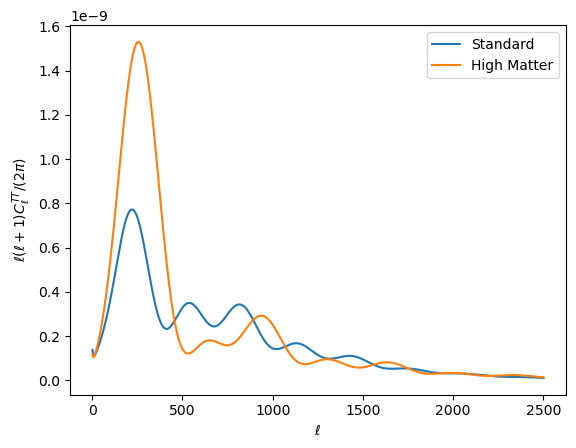

In [12]:
ells = base_cls['ell'][2:]

plt.figure()
plt.plot(ells, ells*(ells+1)*base_cls['tt'][2:]/(2*np.pi),
         label='Standard')
plt.plot(ells, ells*(ells+1)*high_cls['tt'][2:]/(2*np.pi),
         label='High Matter')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)$')
plt.legend()
plt.show()

#### It shows the strength of temperature fluctuations in the Cosmic Microwave Background (CMB) at different angular scales.
#### The peaks are acoustic oscillations in the early universe.

Before recombination:

1. The universe was a photon–baryon plasma.

2. Gravity pulled matter inward.

3. Radiation pressure pushed it outward.

This created oscillations — like sound waves.

Each peak corresponds to a specific oscillation phase at recombination:

1. 1st peak → first compression

2. 2nd peak → first rarefaction

3. 3rd peak → second compression

This single curve allows us to measure:

1. Baryon density (ω_b)

2. Dark matter density (ω_cdm)

3. Hubble parameter (h)

4. Spectral index (n_s)

5. Optical depth (τ)

6. Geometry of the universe


First peak is much higher in the orange curve meaining:
The physical matter density (very likely baryon density and/or total matter density) increased.

#### A higher first peak means:

1. Stronger gravitational compression

2. More inertia in the photon–baryon fluid

Second peak is suppressed in the orange curve. That odd/even difference is the classic signature of: Higher baryon density

Baryons enhance compression peaks (1st, 3rd, 5th) and suppress rarefaction peaks (2nd, 4th).

So from your graph you can conclude:

### The baryon fraction increased.

we can observe 

1. Different relative peak amplitudes

2. Slight modification of small-scale structure

That means:

The early universe fluid dynamics changed

The photon–baryon oscillations were altered

Cosmological Conclusions from  Plot


1. The matter content increased
2. The baryon fraction likely increased
3. Acoustic oscillations are stronger
4. Odd/even peak asymmetry confirms baryon effects

Increasing baryons causes two things

1. Deepens gravitational wells

2. Increases inertia of the fluid

which causes 

1. Stronger compressions

2. Suppressed rarefactions

3. More pronounced first peak

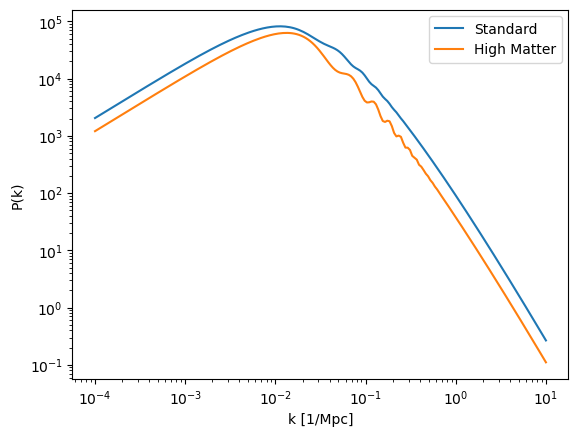

In [13]:
k = np.logspace(-4, 1, 200)

# The error happened because mPk must be in the 'output' and compute() must be called
# These were set in previous cells, but if the error persists,
# we ensure the internal C structures are ready:

pk_base = [cosmo.pk(ki, 0) for ki in k]
pk_high = [high_baryon_cosmo.pk(ki, 0) for ki in k]

plt.figure()
plt.loglog(k, pk_base, label='Standard')
plt.loglog(k, pk_high, label='High Matter')
plt.xlabel('k [1/Mpc]')
plt.ylabel('P(k)')
plt.legend()
plt.show()

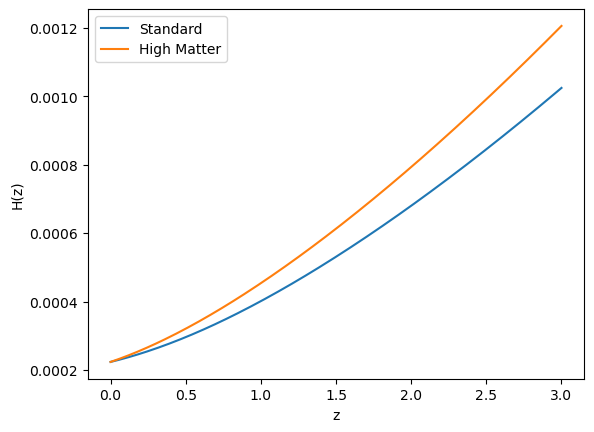

In [14]:
z_vals = np.linspace(0, 3, 200)
Hz_base = [cosmo.Hubble(z) for z in z_vals]
Hz_high = [high_baryon_cosmo.Hubble(z) for z in z_vals]

plt.figure()
plt.plot(z_vals, Hz_base, label='Standard')
plt.plot(z_vals, Hz_high, label='High Matter')
plt.xlabel('z')
plt.ylabel('H(z)')
plt.legend()
plt.show()

## FINAL CONCLUSIONS

1. Increasing matter density increases expansion rate.

2. Increasing baryon fraction suppresses structure growth.

3. Baryons strongly modify acoustic oscillations.
